# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [29]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

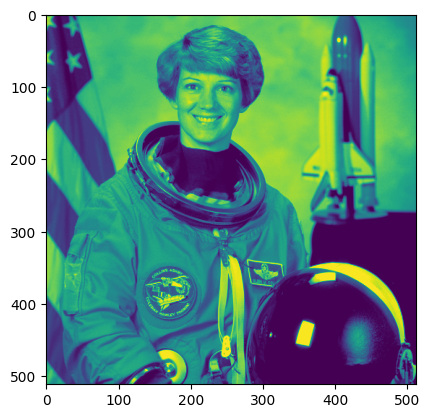

In [30]:
img = plt.imread('data/astronaut.png')
plt.imshow(img)

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [37]:
def meanfilter(imgmean, size):
    result = numpy.zeros(imgmean.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(imgmean.shape):
        if p[0]>=n and p[0]<imgmean.shape[0]-n and p[1]>=n and p[1]<imgmean.shape[1]-n:
            neighborhood_sum = 0
            for q in numpy.ndindex(size,size):
                neighborhood_sum += imgmean[p[0]+q[0]-n, p[1]+q[1]-n]
            result[p] = neighborhood_sum / size**2
    return result
    

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

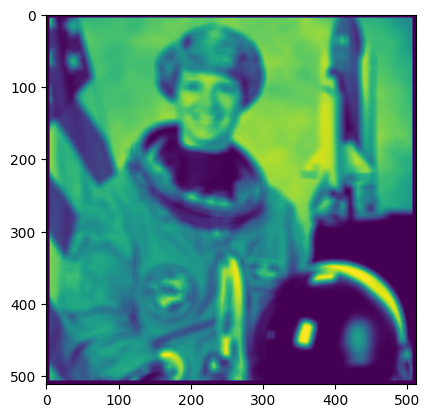

In [44]:
plt.imshow(meanfilter(img,11))

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [48]:
astronaut_meanfilter5 = plt.imread('data/astronaut_meanfilter5.png')
assert numpy.allclose(meanfilter(img,5),astronaut_meanfilter5, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [69]:
def medianfilter(imgmedian, size):
    result = numpy.zeros(imgmedian.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(imgmedian.shape):
        if p[0]>=n and p[0]<imgmedian.shape[0]-n and p[1]>=n and p[1]<imgmedian.shape[1]-n:
            imgmedian_list=list()
            for q in numpy.ndindex(size,size):
                imgmedian_list.append(img[p[0]+q[0]-n, p[1]+q[1]-n])
            imgmedian_list.sort()
            result[p]=imgmedian_list[len(imgmedian_list)//2]
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

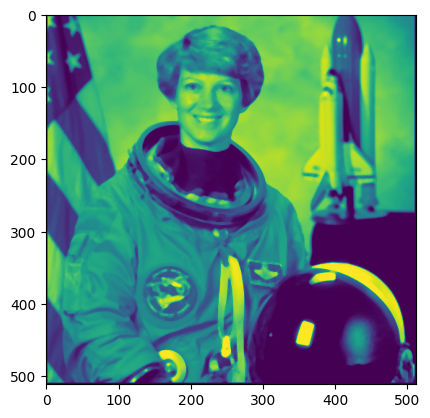

In [71]:
plt.imshow(medianfilter(img,5))

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [72]:
astronaut_medianfilter5 = plt.imread('data/astronaut_medianfilter5.png')
assert numpy.allclose(medianfilter(img,5),astronaut_medianfilter5, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [74]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

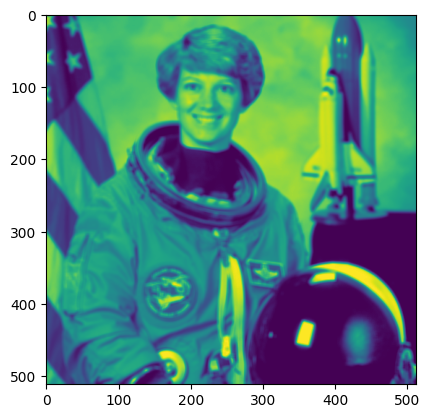

In [80]:
plt.imshow(scipy.ndimage.uniform_filter(img, 5))

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

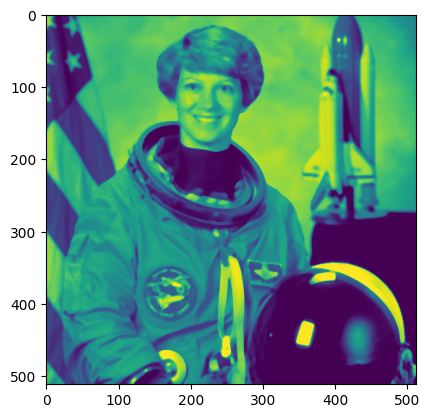

In [81]:
plt.imshow(scipy.ndimage.median_filter(img, 5))

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

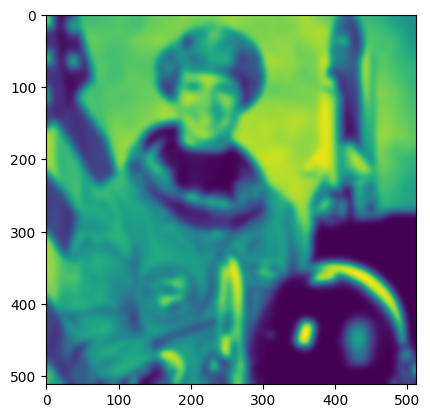

In [82]:
plt.imshow(scipy.ndimage.gaussian_filter(img, 5))

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img, size):
    # write your code here

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: